In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

In [27]:
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


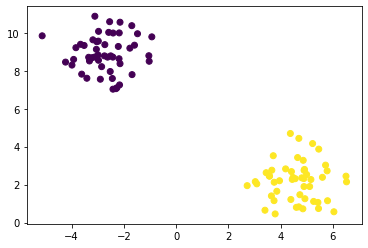

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [31]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, 11_ratio=None, max_iter=100,
   multi_class='warn', n_jobs=None, penalty='12',
   random_state=1, solver='lbfgs' tol=0.0001, verbose=0,
   warm_start=False)

SyntaxError: invalid token (<ipython-input-31-a4b238244f65>, line 2)

In [32]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [33]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [36]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [53]:
df = pd.read_csv(Path('./Resources/house2datav2.csv'))
df.head()

,price,address,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150000,"4105 Fort Hamilton Pkwy, Brooklyn, NY 11219",11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5850,"3272 Steinway St, Long Island City, NY 11103",11103,8/31/20,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699000,"3014 Gunther Ave, Bronx, NY 10469",10469,9/1/20,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000000,"178 Prince St, New York, NY 10012",10012,9/2/20,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115000,"424 E 115th St #2A, New York, NY 10029",10029,9/3/20,0,1.0,120,New York County,879665,31973,300250,594060


# Preprocess Data

In [54]:
new_df = df.drop(['address'], axis=1)
new_df.head()

,price,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150000,11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5850,11103,8/31/20,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699000,10469,9/1/20,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000000,10012,9/2/20,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115000,10029,9/3/20,0,1.0,120,New York County,879665,31973,300250,594060


In [55]:
#Find null Values

for column in new_df.columns:
    print(f"Column {column} has {new_df[column].isnull().sum()} null values")

Column price has 0 null values
Column zip has 0 null values
Column date has 0 null values
Column bds has 0 null values
Column bath has 0 null values
Column sqft has 0 null values
Column boro has 0 null values
Column employed has 0 null values
Column unemployed has 0 null values
Column incomeabovehk has 0 null values
Column incomebelowhk has 0 null values


In [56]:
#Transform price
new_df["price"] = new_df["price"]/1000
new_df.head()

,price,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150.00,11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5.85,11103,8/31/20,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699.00,10469,9/1/20,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000.00,10012,9/2/20,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115.00,10029,9/3/20,0,1.0,120,New York County,879665,31973,300250,594060


In [57]:
#Transform employed
new_df["employed"] = new_df["employed"]/1000
new_df.head()

,price,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150.00,11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149.461,48699,188640,1067440
1,5.85,11103,8/31/20,0,1.0,"1,070",Queens County,1099.996,39401,166650,1015040
2,699.00,10469,9/1/20,0,1.0,"1,800",Bronx County,565.642,32035,44610,621050
3,22000.00,10012,9/2/20,0,1.0,"11,165",New York County,879.665,31973,300250,594060
4,115.00,10029,9/3/20,0,1.0,120,New York County,879.665,31973,300250,594060


In [58]:
#Transform unemployed
new_df["unemployed"] = new_df["unemployed"]/1000
new_df.head()

,price,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150.00,11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149.461,48.699,188640,1067440
1,5.85,11103,8/31/20,0,1.0,"1,070",Queens County,1099.996,39.401,166650,1015040
2,699.00,10469,9/1/20,0,1.0,"1,800",Bronx County,565.642,32.035,44610,621050
3,22000.00,10012,9/2/20,0,1.0,"11,165",New York County,879.665,31.973,300250,594060
4,115.00,10029,9/3/20,0,1.0,120,New York County,879.665,31.973,300250,594060


In [60]:
#Transform incomeabove100k
new_df["incomeabovehk"] = new_df["incomeabovehk"]/1000
new_df.head()

,price,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150.00,11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149.461,48.699,188.64,1067440
1,5.85,11103,8/31/20,0,1.0,"1,070",Queens County,1099.996,39.401,166.65,1015040
2,699.00,10469,9/1/20,0,1.0,"1,800",Bronx County,565.642,32.035,44.61,621050
3,22000.00,10012,9/2/20,0,1.0,"11,165",New York County,879.665,31.973,300.25,594060
4,115.00,10029,9/3/20,0,1.0,120,New York County,879.665,31.973,300.25,594060


In [61]:
#Transform incomebelow100k
new_df["incomebelowhk"] = new_df["incomebelowhk"]/1000
new_df.head()

,price,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150.00,11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149.461,48.699,188.64,1067.44
1,5.85,11103,8/31/20,0,1.0,"1,070",Queens County,1099.996,39.401,166.65,1015.04
2,699.00,10469,9/1/20,0,1.0,"1,800",Bronx County,565.642,32.035,44.61,621.05
3,22000.00,10012,9/2/20,0,1.0,"11,165",New York County,879.665,31.973,300.25,594.06
4,115.00,10029,9/3/20,0,1.0,120,New York County,879.665,31.973,300.25,594.06


In [62]:
# List dataframe data types
new_df.dtypes

price            float64
zip                int64
date              object
bds                int64
bath             float64
sqft              object
boro              object
employed         float64
unemployed       float64
incomeabovehk    float64
incomebelowhk    float64
dtype: object

In [45]:
output_file_path = "./Resources/new_house2datav2.csv"
new_df.to_csv(output_file_path, index=False)

In [38]:
y = df["price"]
X = df.drop(columns="price")